In [1]:
import pandas as pd

marketing = pd.read_csv("/home/carlos/Documentos/Resumenes-Python/databases to have fun/Base master Roas - semanal normal.csv", 
                        parse_dates = ['fecha_inicio_plan','fecha_fin_plan','inicio_reporte','fin_reporte'])

marketing = marketing.fillna(0)

marketing['inversión_total'] = marketing['inversión_total'].astype(int)

marketing.keys()

Index(['cliente_nomenclatura', 'campaña_nomenclatura', 'llave_ventas',
       'llave_unica_mp', 'versión', 'tipo_presupuesto', 'tipo_2', 'comentario',
       'Año-Mes', 'mes_plan', 'campaña_nomenclatura.1', 'plataforma',
       'fecha_inicio_plan', 'fecha_fin_plan', 'inicio_campaña', 'fin_campaña',
       'costo_planeado', 'kpi_planeado', 'serving', 'inversión_plataforma',
       'inversión_total', 'inversión_AdOps', 'Operativo_AdOps',
       'Serving_AdOps', 'costo_operativo', 'semana', 'inicio_reporte',
       'fin_reporte', 'inicio_campaña_reporte', 'fin_campaña_reporte',
       'divisa', 'dinero_gastado', 'impresiones', 'clics', 'conversiones',
       'revenue', 'llave_analytics', 'conversiones_directas',
       'conversiones_asistidas', 'revenue_directo', 'revenue_asistido',
       'total_conversiones', 'total_revenue', 'ultima_actualizacion'],
      dtype='object')

### Introducción a Seaborn

¿Qué es Seaborn y cuándo debe usarlo? 

En este capítulo, ¡lo descubrirás! Además, aprenderá cómo crear diagramas de dispersión y contar diagramas con listas de datos y marcos de datos de pandas.

También se le presentará una de las grandes ventajas de usar Seaborn: la capacidad de agregar fácilmente una tercera variable a sus parcelas utilizando el color para representar diferentes subgrupos.

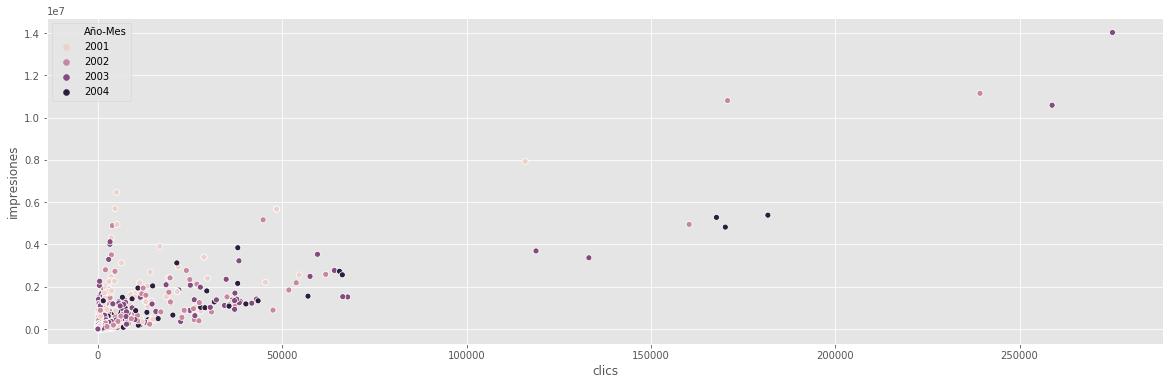

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

#Podemos cuidar el tamaño de nuestras gráficas en los cuadernos jupyter
plt.rcParams['figure.figsize'] = [20, 6]

#scatterplot
sns.scatterplot(x='clics', y='impresiones', data = marketing, hue = 'Año-Mes')

**Conteo de datos en una columna**

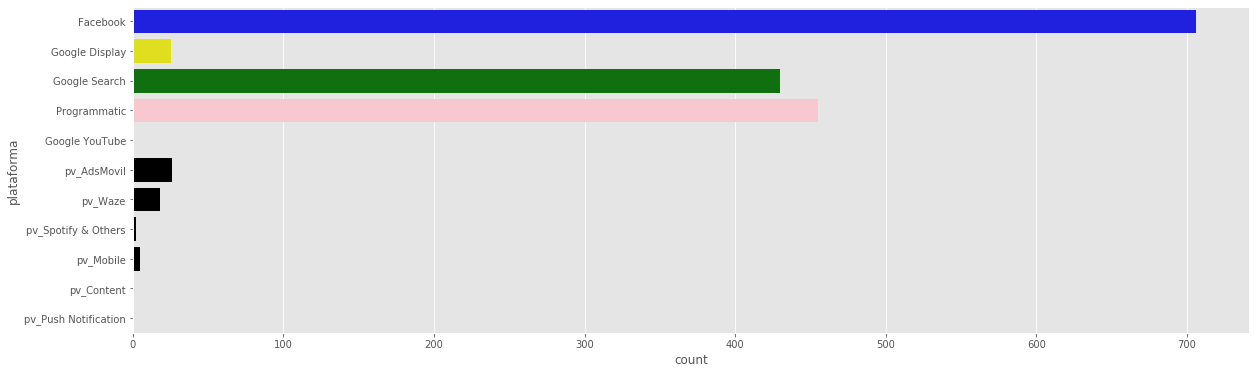

In [22]:
palette_colors = {"Facebook":"blue","Google Search":"green","Programmatic":"pink","Google Display":"yellow",
                  "Google YouTube":"red","pv_AdsMovil":"black","pv_Waze":"black", "pv_Spotify & Others":"black",
                  "pv_Content":"black","pv_Mobile":"black", "pv_Push Notification":"black"}

#Creamos un paleta de colores en caso de querer especificar algún color
a = sns.countplot(y = 'plataforma', data = marketing, palette = palette_colors) #util para contar los registros por columna


### Visualisazión de 2 variables Cuantitativas

En este capítulo, creará y personalizará gráficos que visualizan la relación entre dos variables cuantitativas.

Para hacer esto, usará diagramas de dispersión y diagramas de líneas.

También verá otra gran ventaja de usar Seaborn: ¡la capacidad de crear fácilmente subtramas en una sola figura!

**Crear subtramas con col y row**

Text(0.5, 0.98, 'Plataforas')

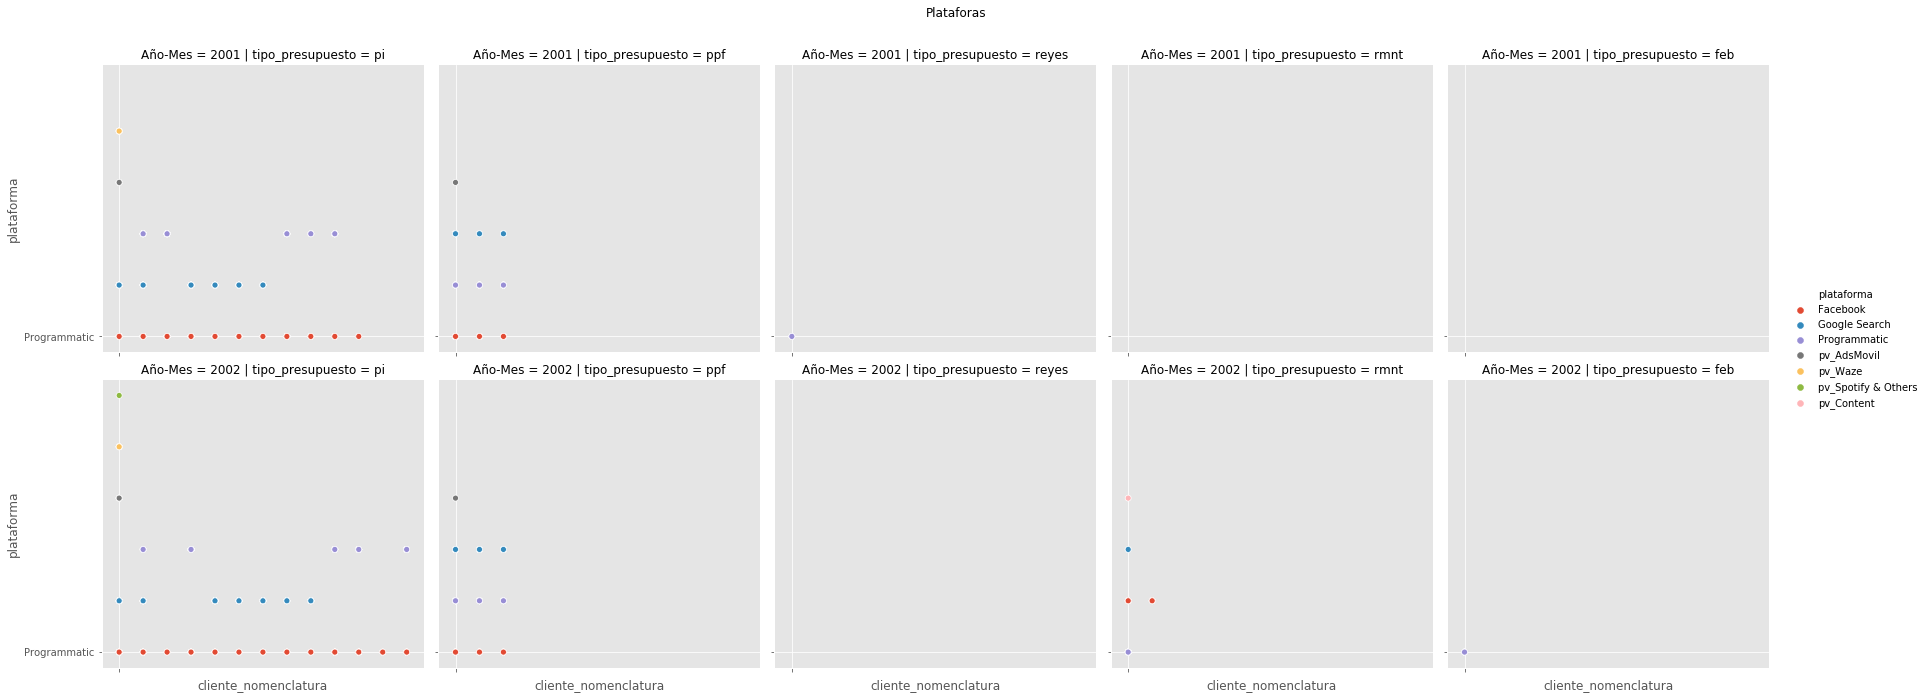

In [31]:
#filtro de los datos
tmp = marketing[(marketing['Año-Mes'] == 2001) | (marketing['Año-Mes'] == 2002)]

#Parametro "col" permite dividir los datos
g = sns.relplot( x = "cliente_nomenclatura", y = "plataforma", 
                 data = tmp, kind = "scatter", 
                 col = "tipo_presupuesto", row = "Año-Mes",
                 hue = "plataforma")

#rotacion de los ejes
g.set_xticklabels(rotation=30)

#subtitulos
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Plataforas')

**Hearmap útil para visualizar una agrupación**

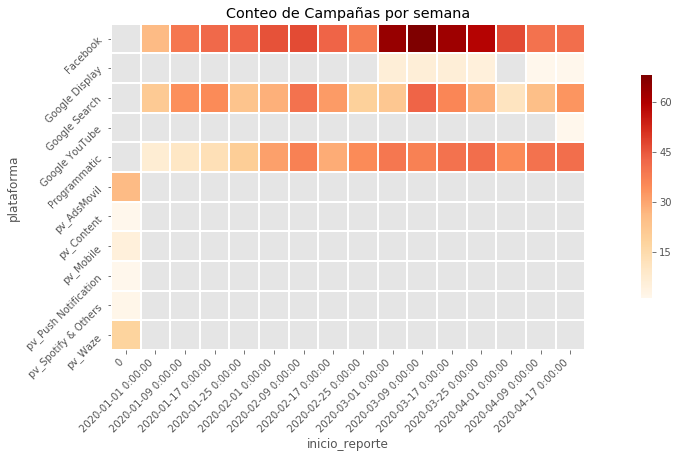

In [4]:
#agrupacion de datos
tmp = marketing.groupby(['plataforma','inicio_reporte']).size().unstack()

#heatmap visualiza las tablas dinamicas muy bien colocando dos variables categoricas y una numerica
g = sns.heatmap(
    tmp, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Conteo de Campañas por semana")

plt.show()

**Gráfica de líneas con desviación estandár**

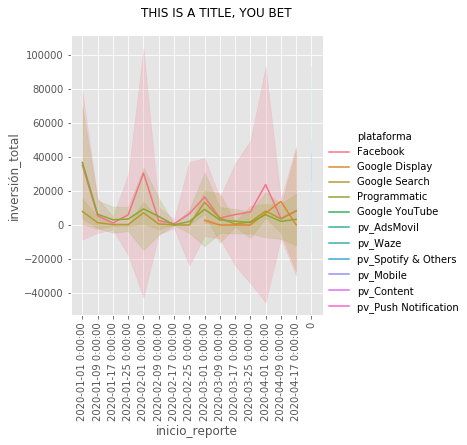

In [32]:
g = sns.relplot(x="inicio_reporte", y="inversión_total", 
            data=marketing, kind="line", 
            ci="sd" ,hue="plataforma", markers=True)

g.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('THIS IS A TITLE, YOU BET')

# Show plot
plt.show()

### Visualizando una variable catégorica y cuantitativa

Las variables categóricas están presentes en casi todos los conjuntos de datos, pero son especialmente prominentes en los datos de la encuesta.

En este capítulo, aprenderá a crear y personalizar gráficos categóricos, como gráficos de cajas, gráficos de barras, gráficos de recuento y gráficos de puntos.


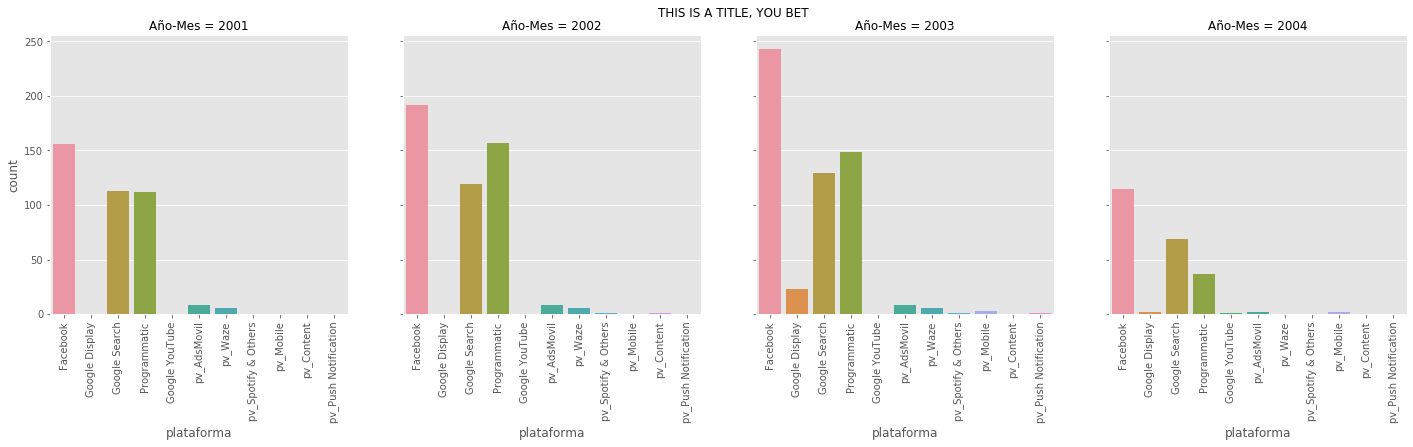

In [33]:
g = sns.catplot(x = 'plataforma', data = marketing, kind = "count", col = "Año-Mes")

g.set_xticklabels(rotation=90)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('THIS IS A TITLE, YOU BET')

plt.show()


Text(0.5, 0.98, 'THIS IS A TITLE, YOU BET')

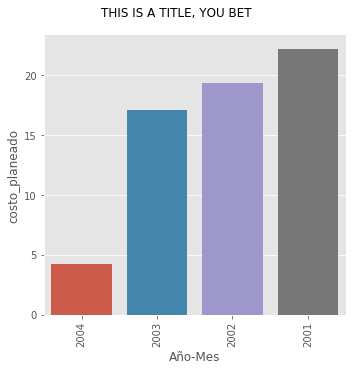

In [35]:
g = sns.catplot(x = "Año-Mes", y = "costo_planeado", 
                data = marketing, kind = "bar",
                order = [2004,2003,2002,2001],
                ci = None)

g.set_xticklabels(rotation = 90)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('THIS IS A TITLE, YOU BET')


**Box plot con sns.catplot**

Text(0.5, 0.98, 'THIS IS A TITLE, YOU BET')

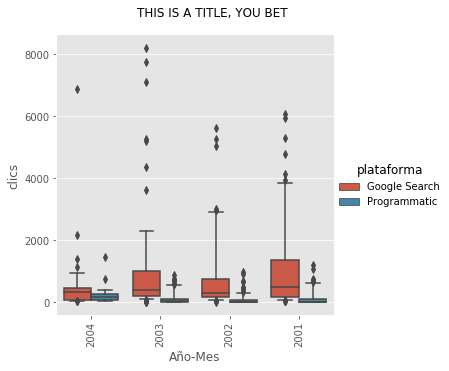

In [59]:
g = sns.catplot(x = "Año-Mes", y = "clics", 
                data = marketing[(marketing["clics"] < 10000) & (marketing["plataforma"] == 'Google Search') | ((marketing["plataforma"] == 'Programmatic'))], 
                kind = "box",
                order = [2004,2003,2002,2001],
                ci = None,
                hue = "plataforma",
                whis=[5,95])

#whis extiende los IQR

g.set_xticklabels(rotation = 90)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('THIS IS A TITLE, YOU BET')


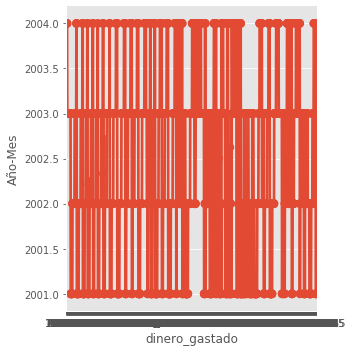

In [63]:
sns.catplot(x = "dinero_gastado", y = "Año-Mes", data = marketing, kind = "point")



### Personalizar parcelas nacidas

En este capítulo final, aprenderá cómo agregar títulos informativos de trama y etiquetas de eje, que son una de las partes más importantes de cualquier visualización de datos.

También aprenderá a personalizar el estilo de sus visualizaciones para orientar más rápidamente a su audiencia hacia los puntos clave. ¡Luego, juntará todo lo que ha aprendido para los ejercicios finales del curso!